<a href="https://colab.research.google.com/github/2006355/ALICE1/blob/master/Coursework_ComputerVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Version Medical data
## Introduction
The problem that we face is use medcial data from a chasted X-Ray images described and analyzed by using deeplearning technique. such as CNN which takes an image and classify them into catorgories which can distinguest them from a normal and pneumonia. The overall objective is to show that the disgust between a normal chast and PNEUMONIA which can look decision and classifiy from the model.

# Research
 
###Introduction
The paper(Hashmi et al., 2020)studies how 7% of the world's child population can be effect by pneumonia every year. The paper looks at how deep learning techniques can help the network to predict results on the dataset quality used. The paper uses a technique called transfer learning to fine-tune the models. The results of the experiment test accuracy of the models have achieved 98.43%. The paper suggests that with transfer learning, CNN can diagnose pneumonia quickly and accurately.  
### Methods Presented
A convolutional Neural Network (CNN) was used to detect pneumonia in the chest. The reason why the experiment used this type of network(LeCun et al.) was that it was able to take features automatically. The network architecture has two convolution layers, two pooling layers, and the output layer, a SoftMax layer. The dataset used is the chest X-ray which had 5836 images. The dataset was split into two main parts a normal and an infected chest; both have a training set and a test set. The paper found that the two sets were highly imbalanced, so the programme shuffled the data of both sets, meaning that 11.95% was used for testing. Five states of the art pre-trained Deep Learning neuron network models are used "ResNet 18"( K. He, X. Zhang, S. Ren and J. Sun, 2016), "DenseNet121"( T. -W. Weng, H. Zhang, P. -Y. Chen, A. Lozano, C. -J. Hsieh and L. Daniel,2018), "InceptionV3 " (Szegedy, C.; Vanhoucke, V.; Ioffe, S.; Shlens, J.; Wojna, Z.,2016), and "Xception"( Chollet, F,2017).

The required preprocessing methods were to resize the images and use normalization. To help not to overfit the model, "Data argumentation" was used to increase the "normal" training set from 1283 to 3399 images and decrease the infected chests from 3873 to 3623; 400 images were used for the weight classifier. The Other technique to help is to rotate 45, vertical shift 0.2, horizontal shift 0.15, Shear 16, crop and Pad 0.25. The number of epochs was 25. Furthermore, the learning rate is 0.001.   

### Results
To obtain the results, a standard PC with 8GB RAM, NVIDIA GeForce GTX 1060 6GB GPU and intel i7, a seventh-generation processor. To summarise the result, the network with the maximum test accuracy and test loss was the DenseNet121( T. -W. Weng, et.al,2018),  which was 98.43, and the testing loss was 0.062. The confusion matrix shows 290 as a true positive (normal) and a false positive as 390(infected).
### Limitation of the Work 
The paper (Hashmi et al., 2020) describes one of the limitations of this experiment was the availability of data. The paper believes that if the images can increase in volume, then it can decrease the chance of overfitting. Another limitation of the experiment is that an understanding of a radiological feature can be visible. To make the model more efficient and a model that considers the patient's history. The history can help the model look at the correct possible solution for that patient.

## Biblography
1. He,  K.;  Zhang,  X.;  Ren,  S.;  Sun,  J.   Deep residual learning for image recognition.In Proceedings ofthe Conference on Computer Vision and Pattern Recognition, Las Vegas, NV, USA, 26 June–1 July 2016;pp. 770–778
Chollet, F. 
2. Xception: Deep learning with depthwise separable convolutions.  In Proceedings of the IEEEConference on Computer Vision and Pattern Recognition, Honolulu, HI, USA, 21–26 July 2017; pp. 1251–1258
3. Szegedy, C.; Vanhoucke, V.; Ioffe, S.; Shlens, J.; Wojna, Z. Rethinking the inception architecture for computervision.  In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition, Las Vegas,NV, USA, 26 June–1 July 2016; pp. 770–778
4. T. -W. Weng, H. Zhang, P. -Y. Chen, A. Lozano, C. -J. Hsieh and L. Daniel, "ON EXTENSIONS OF CLEVER: A NEURAL NETWORK ROBUSTNESS EVALUATION ALGORITHM," 2018 IEEE Global Conference on Signal and Information Processing (GlobalSIP), Anaheim, CA, USA, 2018, pp. 1159-1163, doi: 10.1109/GlobalSIP.2018.8646356
5. H. Ali-Ahmad et al., "CROWD: An SDN Approach for DenseNets," 2013 Second European Workshop on Software Defined Networks, Berlin, Germany, 2013, pp. 25-31, doi: 10.1109/EWSDN.2013.11
6. K. He, X. Zhang, S. Ren and J. Sun, "Deep Residual Learning for Image Recognition," 2016 IEEE Conference on Computer Vision and Pattern Recognition (CVPR), Las Vegas, NV, USA, 2016, pp. 770-778, doi: 10.1109/CVPR.2016.90 
Hashmi, M. F., 
7. Katiyar, S., Keskar, A. G., Bokde, N. D., & Geem, Z. W. (2020). Efficient Pneumonia Detection in Chest Xray Images Using Deep Transfer Learning. Diagnostics, 10(6), 417. https://doi.org/10.3390/diagnostics10060417
 
8. Y. LeCun et al., "Backpropagation Applied to Handwritten Zip Code Recognition," in Neural Computation, vol. 1, no. 4, pp. 541-551, Dec. 1989, doi: 10.1162/neco.1989.1.4.541


note: the impact factor is lower 3.992 for the jounral but eyhad approved for on the 10/03/23

#Data Exploration


##loading data

In [ ]:
#import the required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from matplotlib.image import imread 
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, AveragePooling2D,Flatten, Dense, Conv2D,MaxPool2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


looking at the folders
the

In [ ]:
main_dirction_path ='/content/gdrive/MyDrive/ColabNotebooks/cOMPUTERVERSION/chest_xray'
print(os.listdir(main_dirction_path))

['test', 'train', 'val']


In [ ]:
# path for train/ test and validate folders
train_folder_path = main_dirction_path + '/train/'
test_folder_path = main_dirction_path + '/test/'
val_folder_path = main_dirction_path + '/val/'

this helps with class distrubation that show that they are only two CLASS IN EACH Folder "Normal"  and "Pneumonia"

In [ ]:
train_n_path = train_folder_path+'/NORMAL/'
train_p_path = train_folder_path+'/PNEUMONIA/'

test_n_path = test_folder_path+'/NORMAL/'
test_p_path = test_folder_path+'/PNEUMONIA/'

In [ ]:
print(f'Number of normal images is {len(os.listdir(test_n_path))}') 
print(f'Number of positive images is {len(os.listdir(test_p_path))}') 
print(f'Total training images is {len(os.listdir(test_n_path)) + len(os.listdir(test_p_path))}') 

Number of normal images is 234
Number of positive images is 396
Total training images is 630


setting the images to the same size because it needs to be done for the data distubation 

In [ ]:
labels = os.listdir(train_folder_path)
img_size = 224 
batch_size = 16
n_epochs = 30 
labels

['NORMAL', 'PNEUMONIA']

In [ ]:
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
import os,signal
#os.kill(os.getpid(),signal.SIGKILL)

### Validation Set

Now, we load the training set, but we need to split it into train and validation, this is simply because the original val set in this dataset is relatively small:

In [ ]:
train = get_training_data(train_folder_path)
temp = np.random.permutation(train) # Shuffle the data
train_size = 0.8 # Sets the split ratio

# Assigns 80% to training array and 20% to validation set
train, val = temp[:(int(train_size*len(temp)))], temp[int(train_size*len(temp)):]


test data

In [ ]:
test = get_training_data(test_folder_path)

In [ ]:
print(f'The shape of the training set is {train.shape}') 
print(f'The shape of the test set is {test.shape}') 
print(f'The shape of the val set is {val.shape}') 

The shape of the training set is (4185, 2)
The shape of the test set is (630, 2)
The shape of the val set is (1047, 2)


Class disturbation 

<Axes: ylabel='count'>

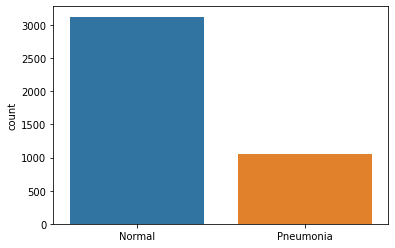

In [ ]:

l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")

sns.countplot(x=l)  

<Axes: ylabel='count'>

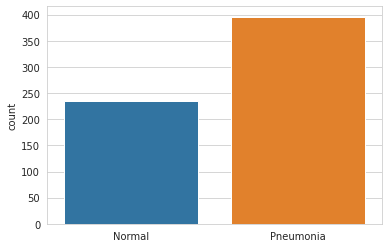

In [ ]:
l = []
for i in test:
  if(i[1] == 0):
     l.append("Normal")
  else:
    l.append("Pneumonia")
sns.set_style('whitegrid')
sns.countplot(x=l)

<Axes: ylabel='count'>

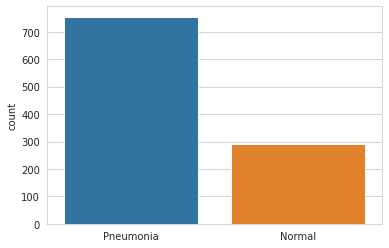

In [ ]:
l = []
for i in val:
  if(i[1] == 0):
     l.append("Normal")
  else:
    l.append("Pneumonia")
sns.set_style('whitegrid')
sns.countplot(x=l)

### explore images
Look different images in the data set.

In [ ]:
import cv2 as cv2
from PIL import Image

(1040, 1272)
(1104, 1328)
(1302, 1564)
(1416, 1736)
(928, 1288)
(1104, 1240)
(1416, 1776)
(1225, 1632)


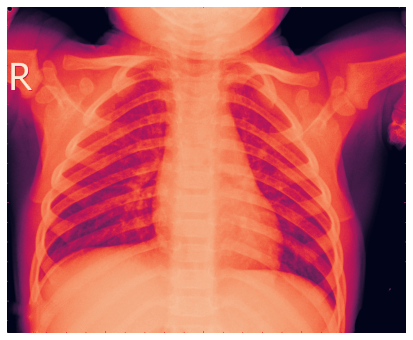

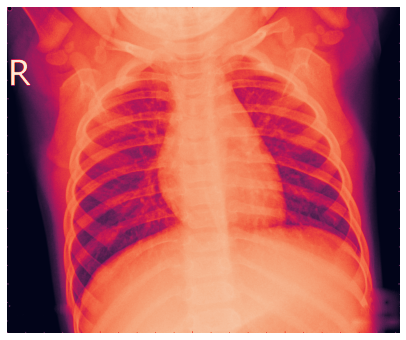

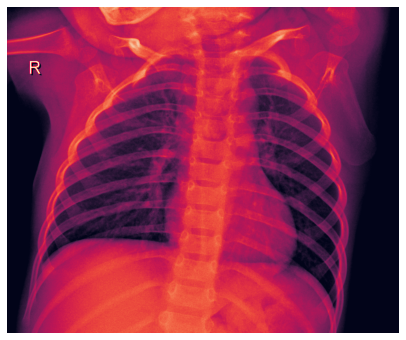

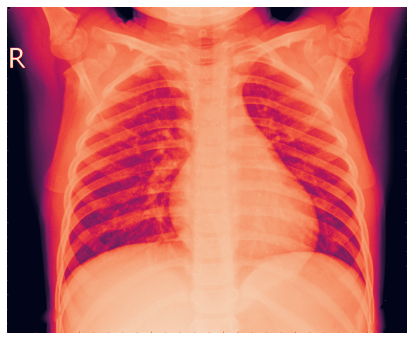

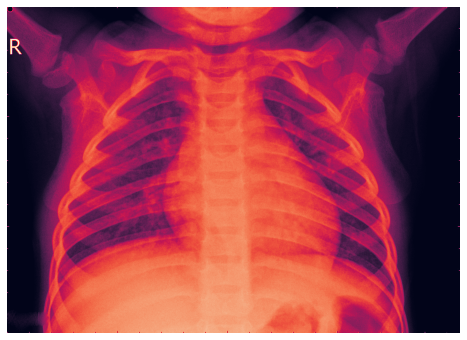

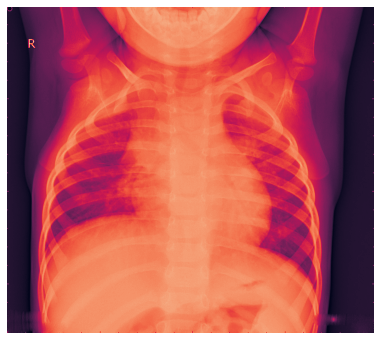

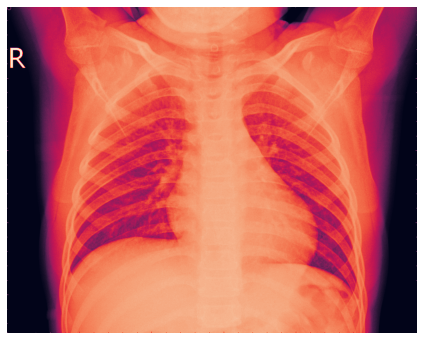

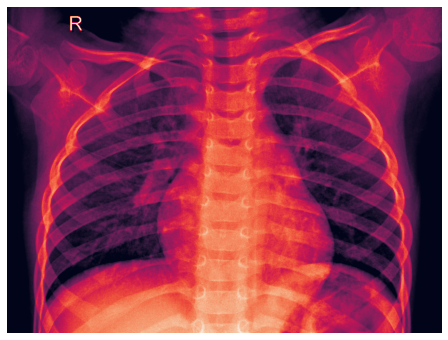

In [ ]:
for images in os.listdir(val_folder_path + '/NORMAL/' ):
  if (images.endswith(".png") or images.endswith(".jpeg")):
    image = Image.open(val_folder_path + '/NORMAL/' + images)
    fig, ax = plt.subplots(1, figsize=(10,6))
    ax.axis('off')   
    plt.imshow(image)
    # convert the image into an array
    image_arr = np.array(image)
    # check the array shape
    print(image_arr.shape)

looking at Pneumonia

(952, 1192)
(944, 1416)
(592, 968)
(864, 1256)
(1128, 1664)
(656, 1016)
(664, 1152)
(712, 1072)


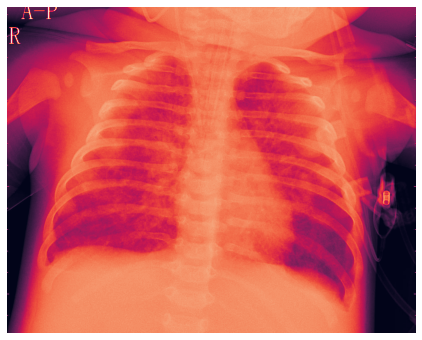

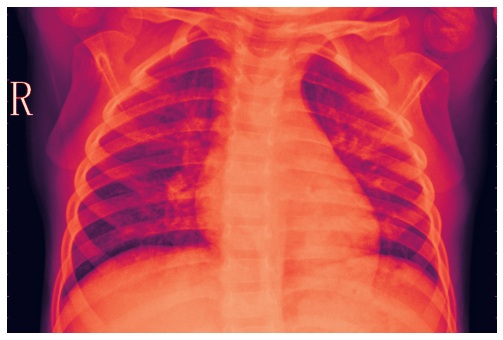

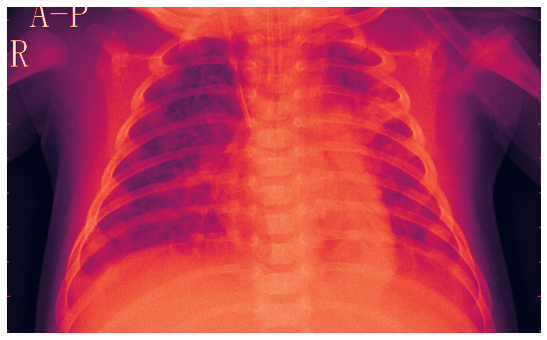

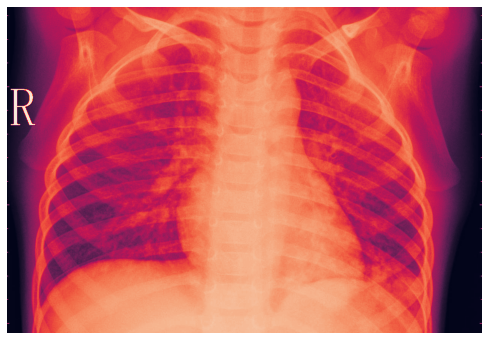

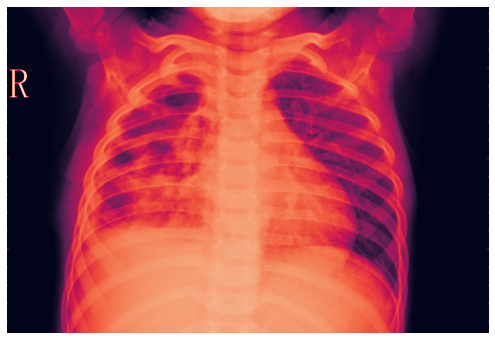

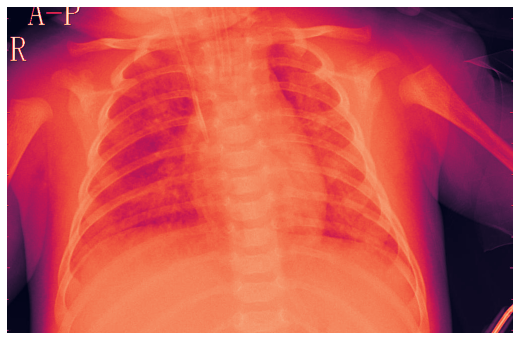

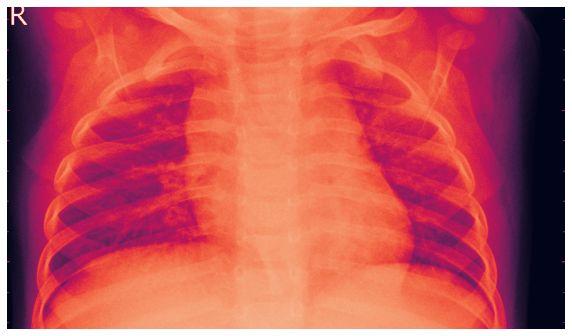

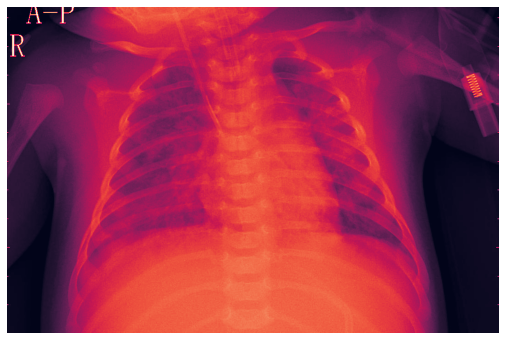

In [ ]:
for images in os.listdir(val_folder_path + '/PNEUMONIA/' ):
  if (images.endswith(".png") or images.endswith(".jpeg")):
    image = Image.open(val_folder_path + '/PNEUMONIA/' + images)
    fig, ax = plt.subplots(1, figsize=(10,6))
    ax.axis('off')   
    plt.imshow(image)
    # convert the image into an array
    image_arr = np.array(image)
    # check the array shape
    print(image_arr.shape)

The image shape show that the queilty of images show overall that the colors are green and blue. 

# Baseline model
The base line model is based on lab5 work that was done in the class. the model will allow them to set the standard of the nerual network. The(Szepesi, P. and Szilágyi, L,(2022)),  The paper is much more recent paper and has impact factor over 4.00 then research paper that is given above . paper uses a model resize has the same image size as it produces it the parper use a optimiser for the model is Adam and epoch used 100 epoch but say 30 epoch is enough to show no overfitting. the model uses dropout where sone of the neurons are not used. By using the dropout it can have more hidden layer and making more acuate.  the paper models activation relu to in the one with softmax.


Szepesi, P. and Szilágyi, L. (2022) “Detection of pneumonia using convolutional neural networks and Deep Learning,” Biocybernetics and Biomedical Engineering, 42(3), pp. 1012–1022. Available at: https://doi.org/10.1016/j.bbe.2022.08.001. 


In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

datagen = ImageDataGenerator(

      featurewise_center=False, 
      samplewise_center=False, 
      featurewise_std_normalization=False, 
      samplewise_std_normalization=False, 
      zca_whitening=False, 
      rotation_range = 30, 
      zoom_range = 0.2, 
      
      width_shift_range = 0.1, 
      height_shift_range = 0.1, 
      horizontal_flip = True, 
      vertical_flip=False) 

datagen.fit(x_train)

In [ ]:
# Normalise the data 

x_train = np.array(x_train) / 255.0
x_val = np.array(x_val) / 255.0
x_test = np.array(x_test) / 255.0

In [ ]:

x_train = x_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 3)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

building the CNN Model
the CNN model which is based on the research paper 

## implementing the model

In [ ]:
## Model setup
model = Sequential()
model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(64, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(64, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(128, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(256, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = 'sigmoid'))
LEARN_RATE = 1e-4
from tensorflow.keras.optimizers import Adam
model.compile(
              optimizer = Adam(lr = LEARN_RATE), loss = 'binary_crossentropy', 
              metrics = ['accuracy']
              )


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_5 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 dropout_4 (Dropout)         (None, 112, 112, 64)      0         
                                                                 
 batch_normalization_6 (Batc  (None, 112, 112, 64)    

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1, factor = 0.3, min_lr = 0.000001)

In [ ]:
total = len(os.listdir(train_n_path)) + len(os.listdir(train_p_path))
neg = len(os.listdir(train_n_path))
pos = len(os.listdir(train_p_path))

weight_for_0 = 1 /neg * (total/2.0)
weight_for_1 = 1/pos *(total/2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}
class_weight

{0: 1.939214232765011, 1: 0.6737058975019315}

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size = batch_size), 
                    epochs = n_epochs, validation_data = datagen.flow(x_val, y_val), 
                    callbacks = [learning_rate_reduction], class_weight = class_weight)

Epoch 1/30
262/262 [==============================] - 55s 194ms/step - loss: 0.5437 - accuracy: 0.8542 - val_loss: 2.3964 - val_accuracy: 0.7335 - lr: 0.0010
Epoch 2/30
262/262 [==============================] - 52s 197ms/step - loss: 0.2789 - accuracy: 0.8927 - val_loss: 13.1660 - val_accuracy: 0.7335 - lr: 0.0010
Epoch 3/30
262/262 [==============================] - ETA: 0s - loss: 0.2947 - accuracy: 0.8922
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
262/262 [==============================] - 52s 199ms/step - loss: 0.2947 - accuracy: 0.8922 - val_loss: 3.5766 - val_accuracy: 0.7335 - lr: 0.0010
Epoch 4/30
262/262 [==============================] - 52s 195ms/step - loss: 0.2444 - accuracy: 0.9039 - val_loss: 1.7855 - val_accuracy: 0.7584 - lr: 3.0000e-04
Epoch 5/30
262/262 [==============================] - 51s 195ms/step - loss: 0.1969 - accuracy: 0.9247 - val_loss: 3.7744 - val_accuracy: 0.7345 - lr: 3.0000e-04
Epoch 6/30
262/262 [====================

<Axes: >

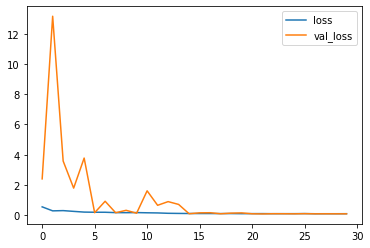

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

<Axes: >

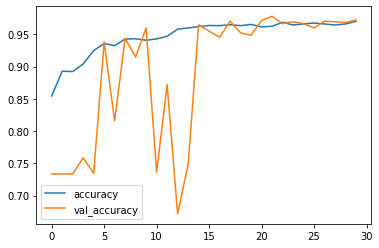

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 2s 111ms/step - loss: 0.2192 - accuracy: 0.9222
Loss of the model is -  0.21916598081588745
20/20 [==============================] - 0s 9ms/step - loss: 0.2192 - accuracy: 0.9222
Accuracy of the model is -  92.22221970558167 %


## the results 
the accuracy of the model show that the model showed the over all is 93.3% overall accuracy. the overall result is 0.18 of model.



In [ ]:
from tensorflow.keras.models import load_model
#model.save('CNN_PNEUMONIA.h5') # 
#cnn_model = load_model("./CNN_PNEUMONIA.h5")
predictions=model.predict(x_test) 
pred_labels= np.where(predictions>0.5, 1, 0)

20/20 [==============================] - 0s 7ms/step


## eveluation 
the evaluation is showing in the matrix model. and the percsion and is also below 

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, pred_labels, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.86      0.94      0.90       234
   Normal (Class 1)       0.97      0.91      0.94       396

           accuracy                           0.92       630
          macro avg       0.91      0.93      0.92       630
       weighted avg       0.93      0.92      0.92       630



The precision factor for pneumonia is 91%, and for normal is (96%) which is: $$ precision=\frac{TP}{TP+FP}$$ the shows overall that the model predicted 94% positive true then 7% as false positive, which is when the data-label is wrong.The recall of both class is 94%: which is: $$recall=\frac{TP}{TP+FN}$$

The results show that the true positive show that the model recalled with that 62% was true and 6% was predicted wrong. They suggest that it is an excellent model to use as a base. The next step is to improve by using a pre-trained model. The paper suggests using VGG-16 


In [ ]:
# store actual class labels and predicted ones in a dataframe

results = pd.DataFrame({'Actual':y_test,'Predicted':pred_labels.flatten()})

incorrect_df = results[results.Actual!=results.Predicted]
incorrect_df.head()

Actual  Predicted
13       0          1
23       0          1
39       0          1
62       0          1
83       0          1

In [ ]:
print(f'Accuracy is {round((results.shape[0]-incorrect_df.shape[0])/results.shape[0],2)*100} %')

Accuracy is 92.0 %


the model accuracy is between 90 - 94 %  it depends what optimzer you are using. 

# Soluation Improvement

## Exposer 
this make the image more defined. https://homepages.inf.ed.ac.uk/rbf/HIPR2/histeq.htm

In [ ]:
from skimage import exposure

In [ ]:
def equlize_hist_ (image):
  _image = np.asarray(image)
  image_eq = exposure.equalize_hist(_image)
  return image_eq


In [ ]:
def expose_imgae(Normal=True):
    if Normal==True:
        # Choose normal random image: generate random number between 1 and  the number of normal images in the training set
        random_img_ind= np.random.randint(0,len(os.listdir(train_n_path))) 
        # image file name 
        img_expose_name = os.listdir(train_n_path)[random_img_ind]

        # path to the image
        img_expose_address = train_n_path+img_expose_name

        # load mage 
        img_expose = Image.open(img_expose_address)
        img = np.asarray(img_expose)
        image_eq = equlize_hist_(img)
        figure1 = plt.figure(figsize= (16,16))
        img_1 = figure1.add_subplot(1,2,1)
        img_plot = plt.imshow(img, cmap = 'gray')
        img_1.set_title('Normal')
        plt.axis("off")

        img2 = figure1.add_subplot(1, 2, 2)
        img_plot = plt.imshow(image_eq, cmap = 'gray')
        img2.set_title('Normal after HE')
        plt.axis("off") 
    else:
        # Choose normal random image: generate random number between 1 and  the number of normal images in the training set
        random_img_ind= np.random.randint(0,len(os.listdir(train_p_path))) 
        # image file name 
        img_expose_name = os.listdir(train_p_path)[random_img_ind]

        # path to the image
        img_expose_address = train_p_path+img_expose_name

        # load mage 
        img_expose = Image.open(img_expose_address)
        img = np.asarray(img_expose)
        image_eq = equlize_hist_(img)
        figure1 = plt.figure(figsize= (16,16))
        img_1 = figure1.add_subplot(1,2,1)
        img_plot = plt.imshow(img, cmap = 'gray')
        img_1.set_title('Pneumonia')
        plt.axis("off")

        img2 = figure1.add_subplot(1, 2, 2)
        img_plot = plt.imshow(image_eq, cmap = 'gray')
        img2.set_title('Pneumonia after HE')
        plt.axis("off") 

       

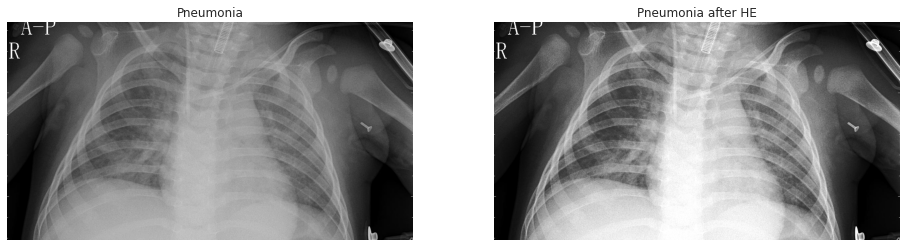

In [ ]:
expose_imgae(False)

## Tranfer Learning
The paper suggest that is vgg-16 (Brunese L,,et al(2020)) and VGG-19 (Panwar.H (2020)has accuecy between 95 to 97 and interception model because it has been suggested for use as it produced 97% of accuracy in the paper. All the layers are unfrozen to look like trainable models. The use code from the label adds some extra density to the model. to increase the model's output. 

Brunese L, Mercaldo F, Reginelli A, Santone A. ExplainableDeep Learning for Pulmonary Disease and CoronavirusCOVID-19 Detection from X-rays. Comput Meth Prog Biomed2020;196 .https://doi.org/10.1016/j.cmpb.2020.105608105608\
Panwar H, Gupta PK, Siddiqui MK, Morales-Menendez R,Bhardwaj P, Singh V. A deep learning and grad-CAM basedcolor visualization approach for fast detection of COVID-19cases using chest X-ray and CT-Scan images. Chaos, Solitons& Fractals 2020;140 .https://doi.org/10.1016/j.chaos.2020.110190110190

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3


##interception model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#tf.keras.backend.clear_session()

base_model = VGG19(
    weights='imagenet',
    input_shape=(img_size, img_size, 3),
    include_top=False)
# freeze the layers
base_model.trainable = True

80134624/80134624 [==============================] - 5s 0us/step


Fine tuning the model 


In [ ]:
# Retrain the last 1000 layers (all lower layers will be kept frozen)
for layer in base_model.layers[:-1000]:
    layer.trainable = False

In [ ]:
 def get_pretrained():
   inputs = layers.Input(shape=(img_size,img_size, 3))
   x = base_model(inputs)
   # Head
   x = layers.GlobalAveragePooling2D()(x)
   x = layers.Dense(128, activation='relu')(x)
   x = layers.Dropout(0.1)(x)
   #Final Layer (Output)
   output = layers.Dense(1, activation='sigmoid')(x)
   model = tf.keras.Model(inputs=[inputs], outputs=output)
   return model

In [ ]:
model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d_7   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_90 (Dense)            (None, 128)               65664     
                                                                 
 dropout_42 (Dropout)        (None, 128)               0         
                                                                 
 dense_91 (Dense)            (None, 1)                 129       
                                                           

In [ ]:

history_ft = model_pretrained.fit(datagen.flow(x_train,y_train, batch_size = batch_size) ,
                    epochs = n_epochs , validation_data = datagen.flow(x_val, y_val) ,
                    callbacks = [learning_rate_reduction],
                    steps_per_epoch = x_train.shape[0]/batch_size,
                    class_weight = class_weight
                   )


Epoch 1/30
262/261 [==============================] - ETA: 0s - loss: 0.3063 - binary_accuracy: 0.8695

261/261 [==============================] - 61s 208ms/step - loss: 0.3063 - binary_accuracy: 0.8695 - val_loss: 0.1397 - val_binary_accuracy: 0.9494 - lr: 5.0000e-05
Epoch 2/30
262/261 [==============================] - ETA: 0s - loss: 0.2092 - binary_accuracy: 0.9214

261/261 [==============================] - 56s 214ms/step - loss: 0.2092 - binary_accuracy: 0.9214 - val_loss: 0.1943 - val_binary_accuracy: 0.9245 - lr: 5.0000e-05
Epoch 3/30
262/261 [==============================] - ETA: 0s - loss: 0.1660 - binary_accuracy: 0.9384

261/261 [==============================] - 54s 205ms/step - loss: 0.1660 - binary_accuracy: 0.9384 - val_loss: 0.1650 - val_binary_accuracy: 0.9475 - lr: 5.0000e-05
Epoch 4/30
262/261 [==============================] - ETA: 0s - loss: 0.1311 - binary_accuracy: 0.9558

261/261 [==============================] - 55s 211ms/step - loss: 0.1311 - binary_accuracy: 0.9558 - val_loss: 0.0990 - val_binary_accuracy: 0.9599 - lr: 5.0000e-05
Epoch 5/30
261/261 [============================>.] - ETA: 0s - loss: 0.1138 - binary_accuracy: 0.9566

261/261 [==============================] - 55s 210ms/step - loss: 0.1138 - binary_accuracy: 0.9568 - val_loss: 0.1100 - val_binary_accuracy: 0.9666 - lr: 5.0000e-05
Epoch 6/30
262/261 [==============================] - ETA: 0s - loss: 0.1132 - binary_accuracy: 0.9582

261/261 [==============================] - 55s 210ms/step - loss: 0.1132 - binary_accuracy: 0.9582 - val_loss: 0.0935 - val_binary_accuracy: 0.9666 - lr: 5.0000e-05
Epoch 7/30
262/261 [==============================] - ETA: 0s - loss: 0.1197 - binary_accuracy: 0.9527

261/261 [==============================] - 54s 205ms/step - loss: 0.1197 - binary_accuracy: 0.9527 - val_loss: 0.2530 - val_binary_accuracy: 0.9016 - lr: 5.0000e-05
Epoch 8/30
261/261 [============================>.] - ETA: 0s - loss: 0.0934 - binary_accuracy: 0.9655

261/261 [==============================] - 54s 207ms/step - loss: 0.0938 - binary_accuracy: 0.9651 - val_loss: 0.1997 - val_binary_accuracy: 0.9255 - lr: 5.0000e-05
Epoch 9/30
261/261 [============================>.] - ETA: 0s - loss: 0.1036 - binary_accuracy: 0.9621

261/261 [==============================] - 54s 208ms/step - loss: 0.1039 - binary_accuracy: 0.9620 - val_loss: 0.0739 - val_binary_accuracy: 0.9694 - lr: 5.0000e-05
Epoch 10/30
262/261 [==============================] - ETA: 0s - loss: 0.0852 - binary_accuracy: 0.9680

261/261 [==============================] - 55s 208ms/step - loss: 0.0852 - binary_accuracy: 0.9680 - val_loss: 0.0778 - val_binary_accuracy: 0.9723 - lr: 5.0000e-05
Epoch 11/30
262/261 [==============================] - ETA: 0s - loss: 0.0806 - binary_accuracy: 0.9682

261/261 [==============================] - 54s 207ms/step - loss: 0.0806 - binary_accuracy: 0.9682 - val_loss: 0.1215 - val_binary_accuracy: 0.9608 - lr: 5.0000e-05
Epoch 12/30
262/261 [==============================] - ETA: 0s - loss: 0.0825 - binary_accuracy: 0.9699

261/261 [==============================] - 55s 210ms/step - loss: 0.0825 - binary_accuracy: 0.9699 - val_loss: 0.0730 - val_binary_accuracy: 0.9742 - lr: 5.0000e-05
Epoch 13/30
262/261 [==============================] - ETA: 0s - loss: 0.0758 - binary_accuracy: 0.9704

261/261 [==============================] - 55s 210ms/step - loss: 0.0758 - binary_accuracy: 0.9704 - val_loss: 0.0848 - val_binary_accuracy: 0.9666 - lr: 5.0000e-05
Epoch 14/30
262/261 [==============================] - ETA: 0s - loss: 0.0711 - binary_accuracy: 0.9708

261/261 [==============================] - 54s 208ms/step - loss: 0.0711 - binary_accuracy: 0.9708 - val_loss: 0.0824 - val_binary_accuracy: 0.9713 - lr: 5.0000e-05
Epoch 15/30
262/261 [==============================] - ETA: 0s - loss: 0.0780 - binary_accuracy: 0.9685

261/261 [==============================] - 54s 205ms/step - loss: 0.0780 - binary_accuracy: 0.9685 - val_loss: 0.1524 - val_binary_accuracy: 0.9503 - lr: 5.0000e-05
Epoch 16/30
261/261 [============================>.] - ETA: 0s - loss: 0.0754 - binary_accuracy: 0.9715

261/261 [==============================] - 54s 206ms/step - loss: 0.0752 - binary_accuracy: 0.9716 - val_loss: 0.0694 - val_binary_accuracy: 0.9761 - lr: 5.0000e-05
Epoch 17/30
262/261 [==============================] - ETA: 0s - loss: 0.0484 - binary_accuracy: 0.9811

261/261 [==============================] - 55s 208ms/step - loss: 0.0484 - binary_accuracy: 0.9811 - val_loss: 0.0891 - val_binary_accuracy: 0.9713 - lr: 5.0000e-05
Epoch 18/30
262/261 [==============================] - ETA: 0s - loss: 0.0730 - binary_accuracy: 0.9711

261/261 [==============================] - 54s 205ms/step - loss: 0.0730 - binary_accuracy: 0.9711 - val_loss: 0.0811 - val_binary_accuracy: 0.9713 - lr: 5.0000e-05
Epoch 19/30
261/261 [============================>.] - ETA: 0s - loss: 0.0692 - binary_accuracy: 0.9734

261/261 [==============================] - 55s 210ms/step - loss: 0.0701 - binary_accuracy: 0.9730 - val_loss: 0.1336 - val_binary_accuracy: 0.9589 - lr: 5.0000e-05
Epoch 20/30
262/261 [==============================] - ETA: 0s - loss: 0.0572 - binary_accuracy: 0.9763

261/261 [==============================] - 54s 206ms/step - loss: 0.0572 - binary_accuracy: 0.9763 - val_loss: 0.1051 - val_binary_accuracy: 0.9675 - lr: 5.0000e-05
Epoch 21/30
261/261 [============================>.] - ETA: 0s - loss: 0.0543 - binary_accuracy: 0.9799

261/261 [==============================] - 54s 206ms/step - loss: 0.0541 - binary_accuracy: 0.9799 - val_loss: 0.0498 - val_binary_accuracy: 0.9809 - lr: 5.0000e-05
Epoch 22/30
262/261 [==============================] - ETA: 0s - loss: 0.0541 - binary_accuracy: 0.9799

261/261 [==============================] - 54s 208ms/step - loss: 0.0541 - binary_accuracy: 0.9799 - val_loss: 0.0521 - val_binary_accuracy: 0.9819 - lr: 5.0000e-05
Epoch 23/30
262/261 [==============================] - ETA: 0s - loss: 0.0637 - binary_accuracy: 0.9787

261/261 [==============================] - 56s 213ms/step - loss: 0.0637 - binary_accuracy: 0.9787 - val_loss: 0.0840 - val_binary_accuracy: 0.9742 - lr: 5.0000e-05
Epoch 24/30
262/261 [==============================] - ETA: 0s - loss: 0.0651 - binary_accuracy: 0.9763

261/261 [==============================] - 55s 210ms/step - loss: 0.0651 - binary_accuracy: 0.9763 - val_loss: 0.0698 - val_binary_accuracy: 0.9790 - lr: 5.0000e-05
Epoch 25/30
261/261 [============================>.] - ETA: 0s - loss: 0.0540 - binary_accuracy: 0.9775

261/261 [==============================] - 54s 205ms/step - loss: 0.0539 - binary_accuracy: 0.9775 - val_loss: 0.0995 - val_binary_accuracy: 0.9647 - lr: 5.0000e-05
Epoch 26/30
262/261 [==============================] - ETA: 0s - loss: 0.0578 - binary_accuracy: 0.9780

261/261 [==============================] - 53s 204ms/step - loss: 0.0578 - binary_accuracy: 0.9780 - val_loss: 0.0538 - val_binary_accuracy: 0.9799 - lr: 5.0000e-05
Epoch 27/30
262/261 [==============================] - ETA: 0s - loss: 0.0540 - binary_accuracy: 0.9778

261/261 [==============================] - 54s 206ms/step - loss: 0.0540 - binary_accuracy: 0.9778 - val_loss: 0.0572 - val_binary_accuracy: 0.9819 - lr: 5.0000e-05
Epoch 28/30
262/261 [==============================] - ETA: 0s - loss: 0.0511 - binary_accuracy: 0.9804

261/261 [==============================] - 54s 205ms/step - loss: 0.0511 - binary_accuracy: 0.9804 - val_loss: 0.1067 - val_binary_accuracy: 0.9561 - lr: 5.0000e-05
Epoch 29/30
261/261 [============================>.] - ETA: 0s - loss: 0.0467 - binary_accuracy: 0.9808

261/261 [==============================] - 53s 204ms/step - loss: 0.0466 - binary_accuracy: 0.9809 - val_loss: 0.0533 - val_binary_accuracy: 0.9838 - lr: 5.0000e-05
Epoch 30/30
262/261 [==============================] - ETA: 0s - loss: 0.0471 - binary_accuracy: 0.9804

261/261 [==============================] - 54s 206ms/step - loss: 0.0471 - binary_accuracy: 0.9804 - val_loss: 0.0828 - val_binary_accuracy: 0.9733 - lr: 5.0000e-05


## Test and results

<Axes: >

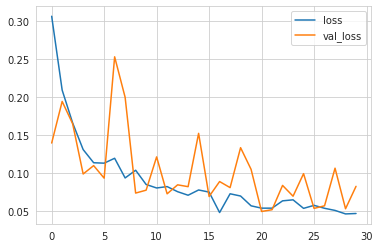

In [ ]:

losses = pd.DataFrame(model_pretrained.history.history)
losses[['loss','val_loss']].plot()

<Axes: >

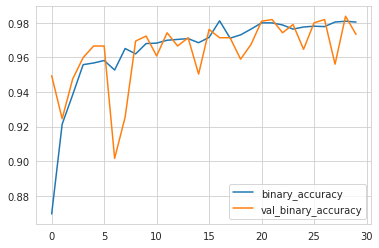

In [ ]:
losses[['binary_accuracy','val_binary_accuracy']].plot()

The curve of the model loss looks good because it goes down and across up and across. This suggests that the model is learning the valid loss is good. However, it does rise at epochs 10 and 15 but goes down.
Accuracy goes up and an across, which shows the model is becoming more accurate. The value accuracy follows a similar trend. It does go down between epochs 10 and 15, as expected, since the loss goes up

In [ ]:

print("Loss of the model is - " , model_pretrained.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model_pretrained.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 4s 188ms/step - loss: 0.1337 - binary_accuracy: 0.9587
Loss of the model is -  0.13374775648117065
20/20 [==============================] - 3s 138ms/step - loss: 0.1337 - binary_accuracy: 0.9587
Accuracy of the model is -  95.8730161190033 %


## Predicting

In [ ]:
from tensorflow.keras.models import load_model
model_pretrained.save('CNN_PNEUMONIAvgg19.h5') # 
#cnn_model = load_model("./CNN_PNEUMONIA.h5")
predictions=model_pretrained.predict(x_test) 
pred_labels= np.where(predictions>0.5, 1, 0)


20/20 [==============================] - 1s 74ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, pred_labels, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.94      0.95      0.94       234
   Normal (Class 1)       0.97      0.96      0.97       396

           accuracy                           0.96       630
          macro avg       0.95      0.96      0.96       630
       weighted avg       0.96      0.96      0.96       630



This shows better result then the base model as the precision better and the recall is better as it better.

<Axes: >

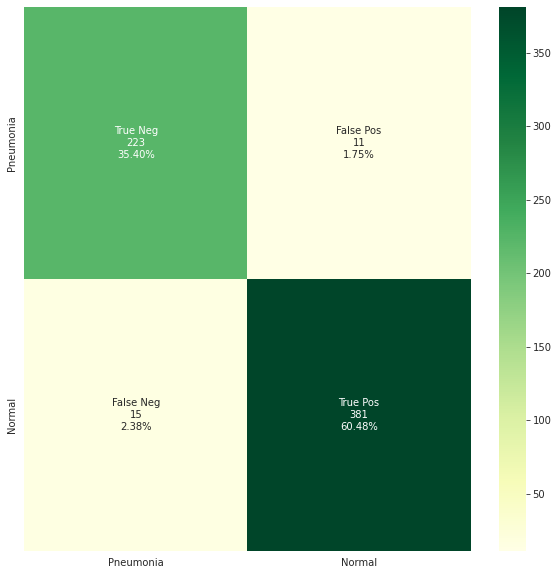

In [ ]:
cf_matrix = confusion_matrix(y_test, pred_labels)
plt.figure(figsize = (10,10))
classes = ['Pneumonia','Normal']
labels = ['TN','FP','FN','TP']
labels = np.asarray(labels).reshape(2,2)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap= "YlGn" ,
            xticklabels = classes,yticklabels = classes
           )

the shows that low images were  falsely negative and as a low number was false positive.

In [ ]:
intersresults = pd.DataFrame({'Actual':y_test,'Predicted':pred_labels.flatten()})

incorrect_df = intersresults[results.Actual!=results.Predicted]
incorrect_df.head()


Actual  Predicted
62        0          1
138       0          1
148       0          1
151       0          1
173       0          1

In [ ]:
print(f'Accuracy is {round((results.shape[0]-incorrect_df.shape[0])/results.shape[0],2)*100} %')

Accuracy is 97.0 %


## testing the model
VGG-16 and 19 vgg16 96% of the test and vgg19 and interceptionv3 came out 97% accuracy. Recommending the use of vgg19 or interceptionv3  

#Conculsion and future work

In conclusion, the model that was used in the baseline model showed results that reasoable to the predicting the classes. The Vegg-16 has more trainable then the model from Lab 5 model which uses dropout and the optimiser from the paper Adam parameters which can help the  compare. By using the pretrain model the model had improved by 2%. the models seem to get almost everything correct. overall, the pretrained model have worked better then the basemodel. In future work combining models might work better or using filters to see if features can be expose more in the image could increase the results.
